# Dataset EDA

In [17]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from tqdm.notebook import tqdm
from nltk.corpus import stopwords

## User review dataset EDA (~100,000 data)

In [5]:
dataset_name = "McAuley-Lab/Amazon-Reviews-2023"
subset_name = "raw_review_All_Beauty"

# prevent re-download dataset
print(f"Loading dataset from cache: {dataset_name} for subset : {subset_name}...")

try:
    full_dataset = load_dataset(dataset_name, subset_name, split="full", streaming=True)
    print("Dataset loaded from cache.")
    # Since the dataset is large, we use only 100,000 samples for EDA
    sample_size = 100000
    print(f"Sampling {sample_size} reviews for EDA...")
    sample_data = []
    for i, sample in tqdm(enumerate(full_dataset), total=sample_size):
        if i >= sample_size:
            break
        sample_data.append(sample)
    
    df_eda = pd.DataFrame(sample_data)
    print(f"EDA dataframe created with {len(df_eda)} rows and {df_eda.shape[1]} columns.")
    print(df_eda.head())
    print(df_eda.info())

except Exception as e:
    print(f"Error loading dataset: {e}")


Loading dataset from cache: McAuley-Lab/Amazon-Reviews-2023 for subset : raw_review_All_Beauty...
Dataset loaded from cache.
Sampling 100000 reviews for EDA...


  0%|          | 0/100000 [00:00<?, ?it/s]

EDA dataframe created with 100000 rows and 10 columns.
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B0

#### Visualization for sample dataset

C:\Users\Hyunseok\AppData\Local\Temp\ipykernel_14812\823281557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_eda, palette='viridis')


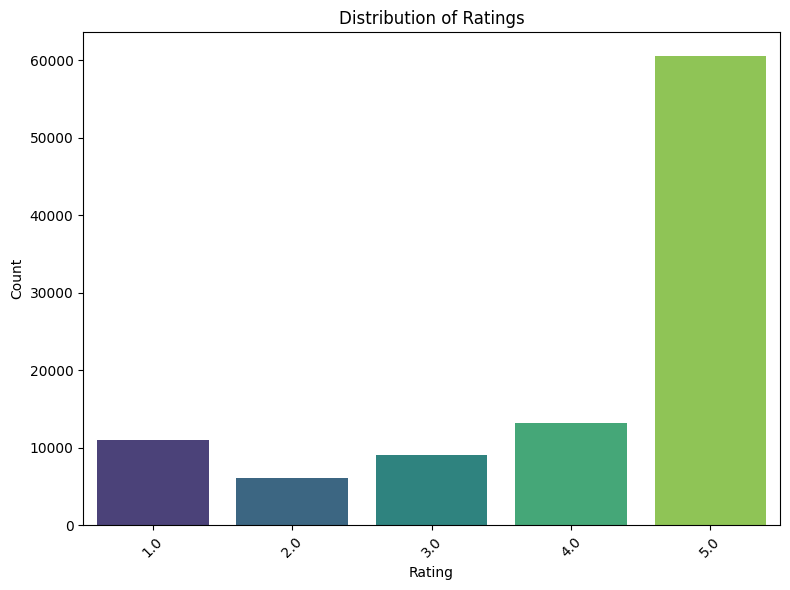

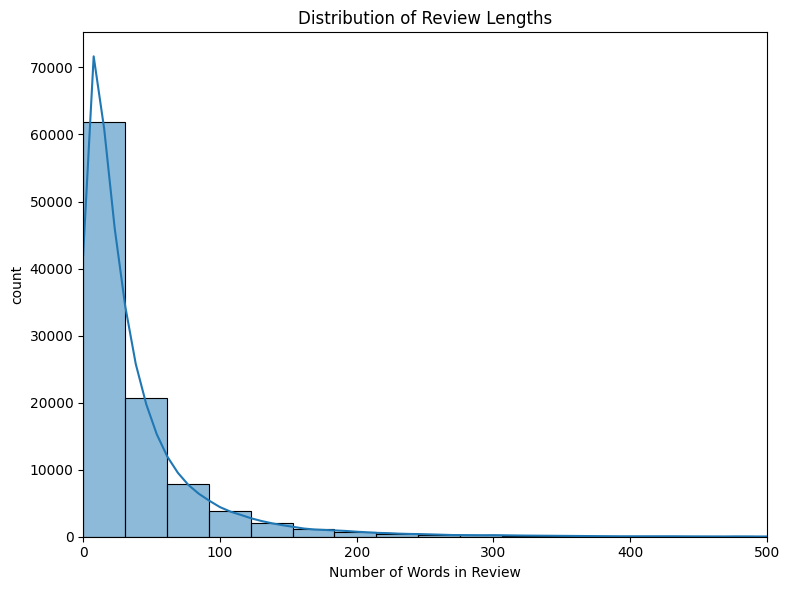

In [9]:
# Review distribution by rating count
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_eda, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Review length distribution
df_eda['review_length'] = df_eda['text'].apply(lambda x: len(x.split() if isinstance(x, str) else 0))
plt.figure(figsize=(8,6))
sns.histplot(df_eda['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('count')
plt.xlim(0, 500) # prevent too long reviews
plt.tight_layout()
plt.show()



#### Check Missing values + Most common words

Checking for missing values in the dataset...
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
review_length        0
dtype: int64
Most common words in reviews:
hair: 28376
like: 21358
great: 21032
use: 19885
product: 19089
love: 17783
good: 15638
one: 14449
skin: 12857
well: 12456


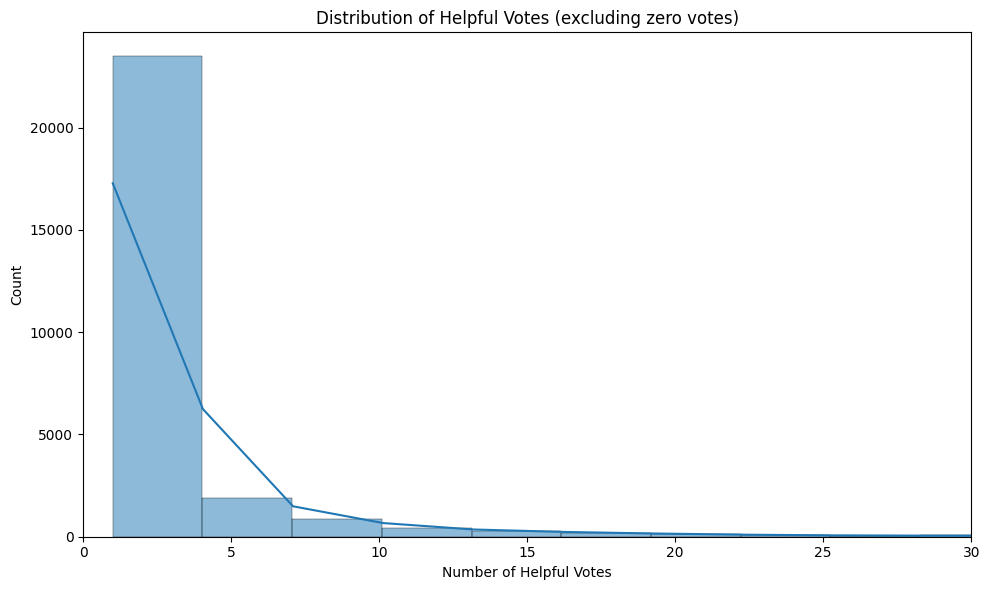

In [29]:
# Find NA/Missing values
print("Checking for missing values in the dataset...")
print(df_eda.isnull().sum())

# Most common words in reviews

all_reviews = ' '.join(df_eda['text'].dropna().astype(str).tolist())
all_reviews = re.sub(r'[^\w\s]', '', all_reviews.lower())  # Remove punctuation and convert to lowercase
all_reviews = re.sub(r'\d+', '', all_reviews)  # Remove numbers
words = all_reviews.split()
stop_words_nltk = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words_nltk and len(word) > 2]
word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(10)
print("Most common words in reviews:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# helpful vote distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda[df_eda['helpful_vote']>0]['helpful_vote'], bins = 200, kde=True)
plt.title('Distribution of Helpful Votes (excluding zero votes)')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Count')
plt.xlim(0, 30)  # Limit x-axis to a reasonable range
plt.tight_layout()
plt.show()

## Metadata EDA

In [39]:
# Load metadata for the subset
dataset_name = "McAuley-Lab/Amazon-Reviews-2023"
meta_subset_name = "raw_meta_All_Beauty"

print(f"Loading metadata for subset: {meta_subset_name}...")
try:
    meta_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
    print("Dataset loaded from cache.")
    # Since the dataset is large, we use only 100,000 samples for EDA
    sample_size = 100000
    print(f"Sampling {sample_size} reviews for EDA...")
    meta_sample_data = []
    for i, sample in tqdm(enumerate(meta_dataset), total=sample_size):
        if i >= sample_size:
            break
        meta_sample_data.append(sample)
    
    metadf_eda = pd.DataFrame(meta_sample_data)
    print(f"EDA dataframe created with {len(metadf_eda)} rows and {metadf_eda.shape[1]} columns.")
    print(metadf_eda.head())
    print(metadf_eda.info())
    print("Metadata loaded successfully.")
except Exception as e:
    print(f"Error loading metadata: {e}")

Loading metadata for subset: raw_meta_All_Beauty...
Dataset loaded from cache.
Sampling 100000 reviews for EDA...


  0%|          | 0/100000 [00:00<?, ?it/s]

EDA dataframe created with 100000 rows and 16 columns.
  main_category                                              title  \
0    All Beauty  Howard LC0008 Leather Conditioner, 8-Ounce (4-...   
1    All Beauty  Yes to Tomatoes Detoxifying Charcoal Cleanser ...   
2    All Beauty   Eye Patch Black Adult with Tie Band (6 Per Pack)   
3    All Beauty  Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...   
4    All Beauty  Precision Plunger Bars for Cartridge Grips – 9...   

   average_rating  rating_number  \
0             4.8             10   
1             4.5              3   
2             4.4             26   
3             3.1            102   
4             4.3              7   

                                            features  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [Material: 304 Stainless

C:\Users\Hyunseok\AppData\Local\Temp\ipykernel_14812\1560746347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='main_category', data=metadf_eda, order=metadf_eda['main_category'].value_counts().index, palette='viridis')


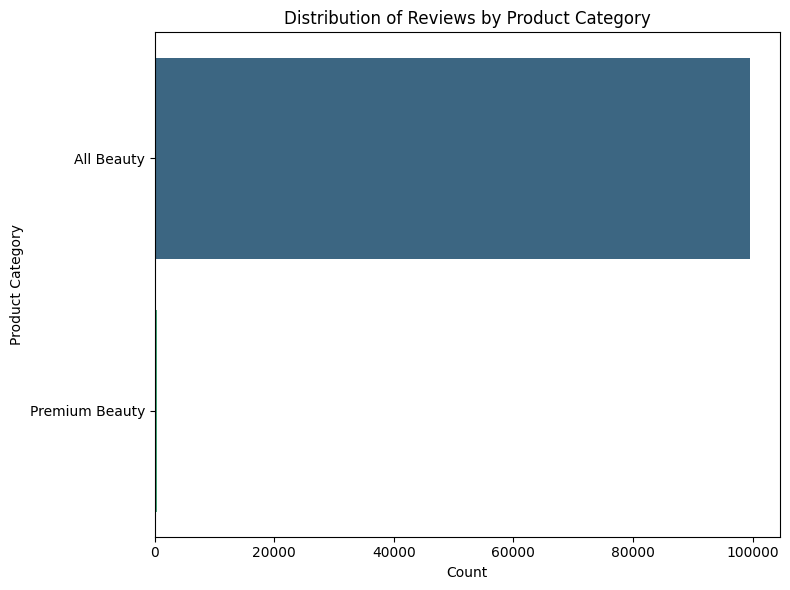

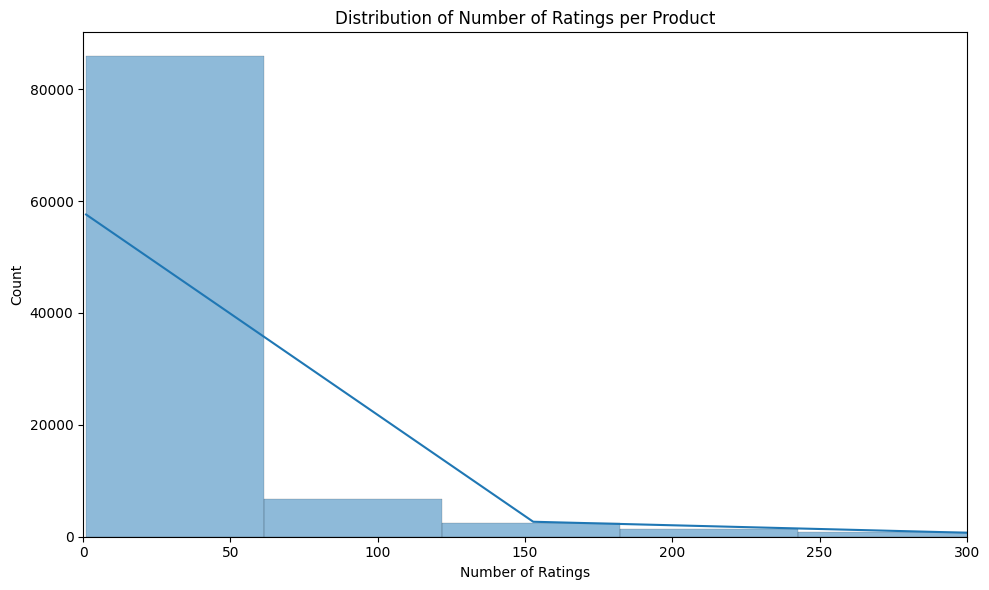

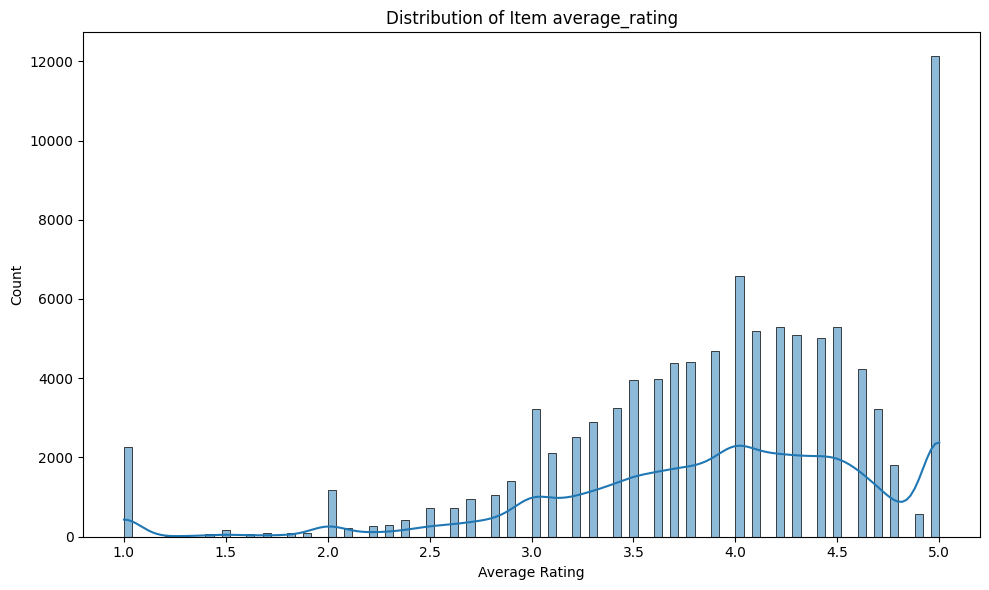

Most common 'bought together' items:
[]


C:\Users\Hyunseok\AppData\Local\Temp\ipykernel_14812\1560746347.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='store', data=metadf_eda, order=metadf_eda['store'].value_counts().index[:15], palette='viridis')


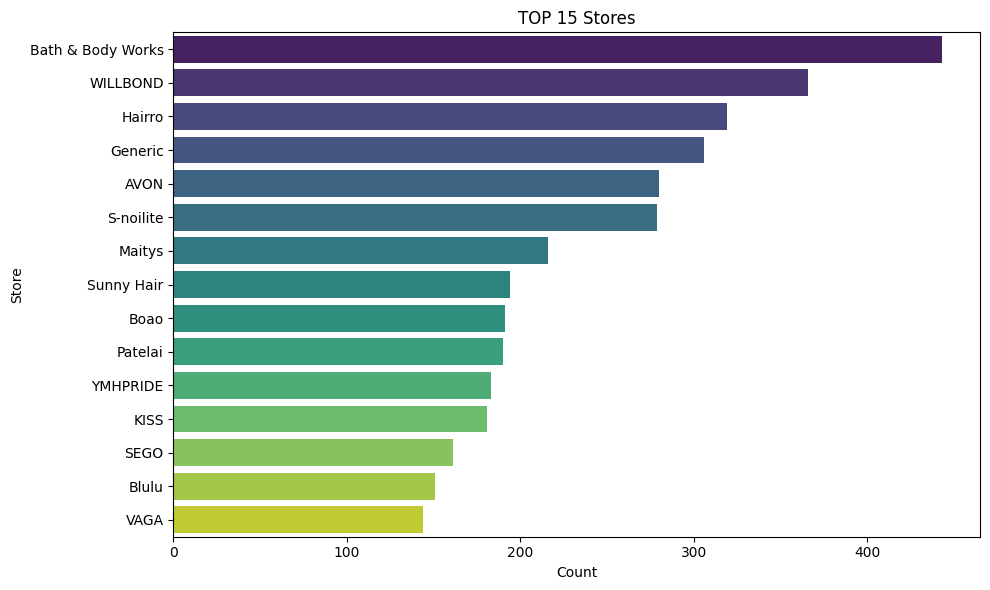

Checking for missing values in the metadata...
main_category           0
title                   0
average_rating          0
rating_number           0
features                0
description             0
price                   0
images                  0
videos                  0
store                9863
categories              0
details                 0
parent_asin             0
bought_together    100000
subtitle           100000
author             100000
dtype: int64


In [70]:
# Review distribution by product category
plt.figure(figsize=(8, 6))
sns.countplot(y='main_category', data=metadf_eda, order=metadf_eda['main_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Reviews by Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


# Review number of ratings in the product
plt.figure(figsize=(10, 6))
sns.histplot(metadf_eda['rating_number'], bins=500, kde=True)
plt.title('Distribution of Number of Ratings per Product')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.xlim(0, 300)  # Limit x-axis 
plt.tight_layout()
plt.show()


# Item average_rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(metadf_eda['average_rating'], bins=100, kde=True)
plt.title('Distribution of Item average_rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# TOP Frequently Bought together items
print("Most common 'bought together' items:")
print(metadf_eda['bought_together'].dropna().tolist())


# TOP 15 Store distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='store', data=metadf_eda, order=metadf_eda['store'].value_counts().index[:15], palette='viridis')
plt.title('TOP 15 Stores')
plt.xlabel('Count')
plt.ylabel('Store')
plt.tight_layout()
plt.show()

# Nan values in metadata
print("Checking for missing values in the metadata...")
print(metadf_eda.isnull().sum())
